# Pandas: exploratory data analysis

### План:
* Соединения таблиц
* Типы переменных
* Работа с категориальными переменными
* Работа с датой и временем
* Пропущенные значения
* Обнаружение аномалий

Также по ходу знакомимся с визуализацией, но подробнее об этом на следующей паре

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

## Соединения таблиц

Часто хранить информацию в одной таблице бывает довольно неудобно. Когда у вас очень крупная IT-компания, данных настолько много, что если их добавить в одну таблицу, работать с ней будет очень неэффективно по времени и памяти. Поэтому информацию кладут в кучу разных таблиц, а над ними строят специальные *отношения* - так называемые колонки, по которым можно эти таблицы объединять. 

Пример устройства такой структуры хранения данных:

<center>
<img src="https://progi.pro/media/main/82/d3/34/82d334f5b4b49d424a2460e796a30cd5.png" height="200" width="600">
</center>   

### 1. Join

<center>
<img src="https://community.qlik.com/legacyfs/online/87693_all-joins.png" height="400" width="400">
</center>

In [7]:
df1 = pd.DataFrame({'Student': ['Tom', 'Ujin', 'Ann', 'Polina','Sam'],
                    'group': ['01', '02', '02', '01','02']})
df2 = pd.DataFrame({'Name': ['Tom', 'Ujin', 'Ann', 'Polina', 'Kit'],
                    'GPA': ['7.8', '6.4', '8.3', '9', '10']})
display(df1, df2)

,Student,group
0,Tom,01
1,Ujin,02
2,Ann,02
3,Polina,01
4,Sam,02


,Name,GPA
0,Tom,7.8
1,Ujin,6.4
2,Ann,8.3
3,Polina,9
4,Kit,10


In [9]:
# right join
pd.merge(df1, df2, left_on='Student', right_on='Name', how='right')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,NaN,NaN,Kit,10


In [5]:
# outer join
pd.merge(df1, df2, left_on='Student', right_on='Name', how='outer')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,Sam,02,NaN,NaN
5,NaN,NaN,Kit,10


In [4]:
# left join - оставляем все, что в левой таблице
pd.merge(df1, df2, left_on='Student', right_on='Name', how='left')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,Sam,02,NaN,NaN


In [8]:
# inner join по умолчанию 
pd.merge(df1, df2, left_on='Student', right_on='Name')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9


### 2. Конкатенация строк

In [11]:
df1 = pd.DataFrame({'name': ['Max', 'Phil', 'Vlad', 'Nastya'], 'students': [20, 21, 30, 42]})
df2 = pd.DataFrame({'name': ['Ahmed', 'Andrey'], 'students': [50, 40]})

display(df1, df2)

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42


,name,students
0,Ahmed,50
1,Andrey,40


In [14]:
pd.concat([df1, df2]).reset_index(drop=True)

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42
4,Ahmed,50
5,Andrey,40


### Пример на клипах по ютубу

Работать в дальнейшем будем с базой данных, содержащей информацию о клипах ютуба. В базе несколько таблиц, между которыми выстроены соединения. Структура выглядит таким образом:  



<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem09_pandas/images/struct.png?raw=true" height="500" width="500">
</center>

__Описание колонок:__

* `id_title` $-$ уникальный id названия видео
* `id_music_style` $-$ уникальный id жанра
* `id_performer` $-$ уникальный id исполнителя
* `title` $-$ название видео
* `commentCount` $-$ число комментариев
* `dislikeCount` $-$ число дизлайков
* `likeCount` $-$ число лайков
* `music_style` $-$ музыкальный стиль
* `performer` $-$ исполнитель
* `viewCount` $-$ число просмотров
* `commentators_uniq` $-$ число уникальных комментаторов
* `comments_obscene_cnt` $-$ число негативных комментариев
* `video_age` $-$ возраст видео в днях (на момент '2019-03-15')

In [2]:
# подгрузим все таблицы
df_perf = pd.read_csv('data/performer_table.csv', sep=';')
df_title = pd.read_csv('data/title_table.csv', sep=';')
df_genre = pd.read_csv('data/music_style_table.csv', sep=';')

df_stat = pd.read_csv('data/title_stat_table.csv', sep=';')

### Задача №1:

Какой исполнитель получает больше всего хейта? (хейт определяется числом негативных комментариев) 

In [33]:
id_ = df_stat[df_stat['comments_obscene_cnt'] == df_stat['comments_obscene_cnt'].max()]['id_performer']
id_

17499    100020
Name: id_performer, dtype: int64

In [38]:
df_perf[df_perf['id_performer'] == 100020]['performer']

29    gazgolder
Name: performer, dtype: object

In [42]:
merged_df = pd.merge(df_stat, df_perf, on='id_performer')
merged_df[merged_df['comments_obscene_cnt'] == merged_df['comments_obscene_cnt'].max()]['performer']

17499    gazgolder
Name: performer, dtype: object

### Задача №2:

Для каждого жанра выведите число просмотров самого популярного клипа? Кто его исполнитель? Как называется клип?

In [47]:
## Ваш код

## Типы переменных

__Классификация переменных по типу данных:__  

* `int` $-$ числовой, целые числа (1000, 0, -1)
* `float` $-$ числовой, вещественные числа (1.0, 2.564523)
* `object` $-$ строковый (бутырка, JPMorgan, f12aaz//)
* `bool` $-$ булевский (True, False)
* `datetime` $-$ дата (2020-01-12, 23.Jan.20)


__Классификация переменных по смыслу:__  

* `Непрерывные` $-$ содержат непрерывное множество значений на каком-то промежутке (з/п, рост человека, вес буханки хлеба и тд)
* `Категориальные` $-$ содержат конечное небольшое множество значений (возраст детей, тип магазина)
* `Бинарные` $-$ подтип категориальной переменной, имеющей только 2 категории (пол, столицы двух стран)

In [3]:
df = pd.read_csv('data/youtube_data_short.csv', sep='\t')

In [4]:
# смотрим на типы переменных 
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

## Работа с категориальными переменными

### Когда категории две:

Отберем только клипы жанра `rock` и `rap`. Представим, что только они нас интересуют. 

In [6]:
df.music_style.value_counts()

rock       5888
estrada    4151
popsa      3339
shanson    2061
rap        2028
indi       1359
classic     298
Name: music_style, dtype: int64

In [9]:
df.music_style.isin(genres_to_keep)

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121     True
19122     True
19123    False
Name: music_style, Length: 19124, dtype: bool

In [10]:
genres_to_keep = ['rock', 'rap']

df_small = df[df.music_style.isin(genres_to_keep)]
df_small.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
38,"""Виктор Цой. 50 лет"" Кукрыниксы - Печаль, Конч...",2.0,4.0,65.0,rock,кукрыниксы,9986.0,2.0,0.0,2351
40,"""Всё, что было"". Начало.",23.0,5.0,171.0,rock,ария,11168.0,21.0,1.0,2351


In [11]:
df_small.music_style.value_counts()

rock    5888
rap     2028
Name: music_style, dtype: int64

В таком "поддатафрейме" наша колонка `music_style` **имеет тип object** (т.к. в ней находятся строки), а также **является бинарной**, так как содержит всего два значения (`rock` и `rap`)

Однако проблема строковых переменных в том, что многие модели не умеют с ними работать. Компьютеру привычнее оперировать с числами. 

Именно поэтому над строковыми бинарными переменными производят нехитрые манипуляции. Либо кодируют их в числа 1 / 0, либо создают булевский тип True / False, что в какой-то степени тоже самое. 

Попробуем преобразовать нашу бинарную строковую переменную music_style:

In [12]:
d = {'rock': 1, 'rap': 0}

df_small['is_rock'] = df_small['music_style'].map(d)

<ipython-input-12-21b19c4d8243>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['is_rock'] = df_small['music_style'].map(d)


In [13]:
df_small.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,is_rock
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539,1
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739,1


### Задача №3: 
Какая доля наблюдений обоих жанров?

In [48]:
## Ваш код

### Когда категорий больше двух

Вернемся к нашему полному датафрейму. В нем music_style принимает не 2 значения, а целых 7. Что делать в таком случае?

**Наивный метод:** Давайте каждому значению из music_style сопоставим какое-нибудь число. Такой метод называется Label Encoding. Заранее подумайте, какие проблемы может создать такой способ?

In [14]:
df.music_style.unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [15]:
# создадим словарь
d = dict(zip(df.music_style.unique(), np.arange(7)))
print(d)

# сделаем преобразование
df['music_style_int'] = df['music_style'].map(d)

{'popsa': 0, 'rock': 1, 'classic': 2, 'indi': 3, 'estrada': 4, 'shanson': 5, 'rap': 6}


Однако проблема такого способа в том, что мы непроизвольным образом установили **порядок** на наших категориях:
$6 > 5 > 4 > 3 > 2 > 1 > 0 \Rightarrow rap > shanson > estrada > indi > classic > rock > popsa$ 


Чтобы такого избежать, чаще используется другой метод: **One Hot Encoding**

<center>
<img src="https://4.bp.blogspot.com/-iC7OQxsaPY0/XMdB9Q9QahI/AAAAAAAAGoY/qEStugMphDIbUIabd_taWCzTyscXzxOPgCLcBGAs/s1600/human_transpose.JPG" height="200" width="600">
</center>   

В pandas такое преобразование можно сделать с помощью функции `get_dummies()`

In [16]:
pd.get_dummies(df['music_style']).head()

,classic,estrada,indi,popsa,rap,rock,shanson
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


Такой метод тоже имеет свои проблемы, которые выходят за рамки нашего курса. Например, это полная мультиколлинеарность (или линейная зависимость) столбцов. Подробнее об этом можно посмотреть здесь: https://www.youtube.com/watch?v=k9PPuTmTLMk

## Работа с датой и временем

Для даты и времени в python есть свой тип переменных: datetime / timestamp. Все полезные методы, оперирующие над датами можно найти либо в пакете pandas, либо в дополнительном пакете `datetime`

In [17]:
# получим дату из строки
pd.to_datetime('01/01/20')

Timestamp('2020-01-01 00:00:00')

In [18]:
# можно получить сегодняшнее число
from datetime import datetime

datetime.today()

datetime.datetime(2021, 4, 22, 18, 27, 10, 338384)

In [19]:
# какой сегодня год?
datetime.today().year

2021

In [26]:
# преобразуем в строку удобного нам формата
datetime.today().strftime('%d/%B/%y %H %I')

'22/April/21 18 06'

In [27]:
from datetime import timedelta

# какой месяц был 50 дней назад?
(datetime.today() - timedelta(days=50)).month

3

In [28]:
datetime.today() - timedelta(days=50)

datetime.datetime(2021, 3, 3, 18, 33, 51, 224409)

### Задача №4: 

В нашем датасете есть колонка `video_age`, которая показывает нам возраст нашего клипа в днях с 15 марта 2019 года. Опираясь на нее, получите для каждого клипа дату его публикации и сохраните в новую колонку. 

In [49]:
## Ваш код

### Задача №5:

Какое распределение кол-ва выпущенных клипов по годам? 

In [50]:
## Ваш код

### Задача №6:

Выведите месяц, в течение которого на ютуб опубликовали больше всего клипов

In [90]:
## Ваш код

## Пропущенные значения

Пропуски в данных $-$ это противная проблема, с которой можно столкнуться при работе. Пропуски возникают практически всегда. Причинами пропусков может быть, например, технические возможности вашего парсера, который не смог достать часть информации из сайта, либо, например, если вы Юрий Дудь и опрашиваете людей об их заработке, собирая статистику для дальнейшего исследования, то вряд ли каждый человек захочет вам ответить. 

### Выявление

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
 10  music_style_int       19124 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.6+ MB


In [31]:
df.isnull().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
music_style_int            0
dtype: int64

In [32]:
df.isnull().sum().sum()

14379

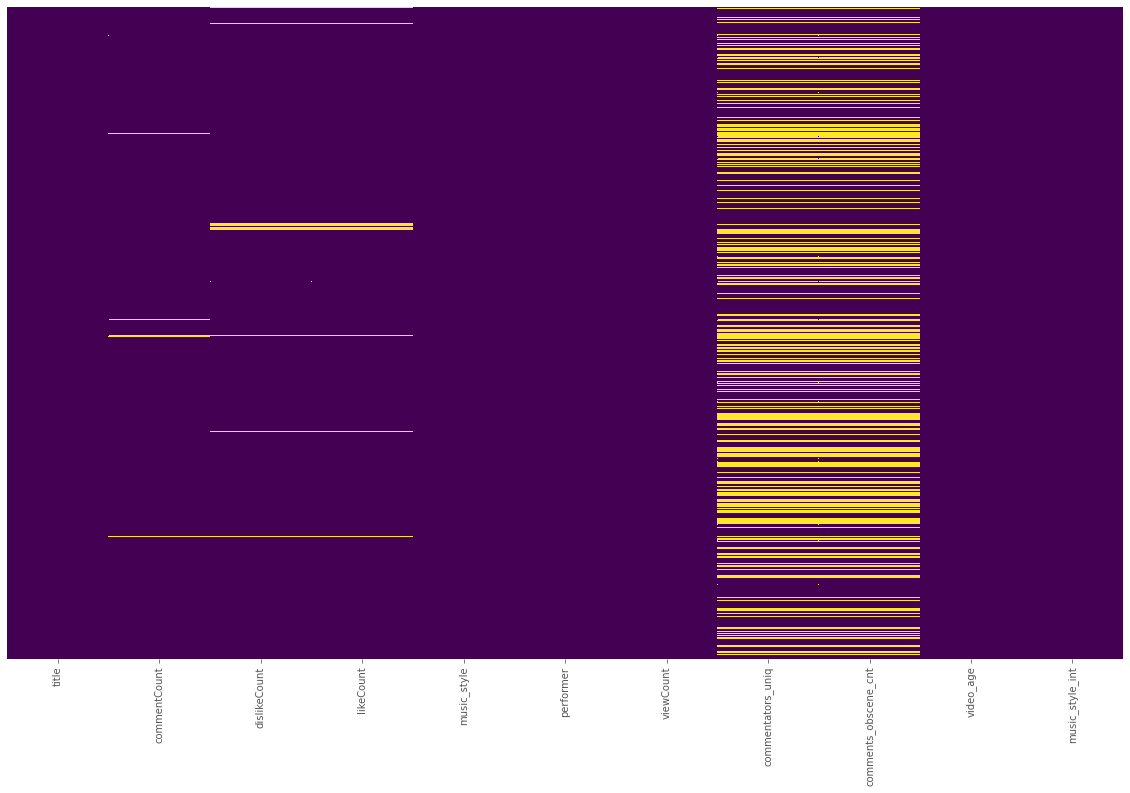

In [285]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Удаление

In [286]:
print(df.shape)

# по умолчанию удаляет строки, где есть na
print(df.dropna().shape)

# можем удалять столбцы, где есть хотя бы один пропуск
print(df.dropna(axis=1).shape)

(19124, 11)
(12116, 11)
(19124, 5)


In [33]:
print(df.shape)

(19124, 11)


In [ ]:
# df = df.dropna()
# df.dropna(inplace=True)

Часто удаление слишком дорогая операция, так как избавляемся от кучи данных, которых и так частенько бывает мало

### Заполнение

In [34]:
# было
ser = pd.Series([24, np.nan, 27, 2])
ser

0    24.0
1     NaN
2    27.0
3     2.0
dtype: float64

In [35]:
# заполняем нулем
ser.fillna(0)

0    24.0
1     0.0
2    27.0
3     2.0
dtype: float64

In [289]:
# заполняем предыдущим значением
ser.fillna(method='ffill').head()

0    24.0
1    24.0
2    27.0
3     2.0
dtype: float64

In [290]:
# заполняем последующим значением
ser.fillna(method='bfill').head()

0    24.0
1    27.0
2    27.0
3     2.0
dtype: float64

### Задача №7:

Заполните пропуски в столбцах таблицы по клипам средними

In [39]:
df.isna().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
music_style_int            0
dtype: int64

In [41]:
cols = ['commentCount', 'dislikeCount', 'likeCount', 'commentators_uniq', 'comments_obscene_cnt']
for col in cols:
    m = df[col].mean()
    df[col].fillna(m, inplace=True)

In [42]:
df.isna().sum()

title                   0
commentCount            0
dislikeCount            0
likeCount               0
music_style             0
performer               0
viewCount               1
commentators_uniq       0
comments_obscene_cnt    0
video_age               0
music_style_int         0
dtype: int64

## Обнаружение аномалий

Аномалии в данных $-$ это столь же частая проблема, что и пропущенные значения, однако более серьезная. Посмотрим на примере, как аномалии могут все испортить:  

### Оцениваем средний рост людей в школьном классе:

Представим, что мы хотим оценить средний рост людей в школьном классе. Имеем следующую таблицу:

In [44]:
students = pd.DataFrame({'student': ['Max', 'Ahmed', 'Nastya', 'Vlad'],
                        'height_cm': [170, 165, 171, 168]})

students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168


Найдем среднее:

In [45]:
students.height_cm.mean()

168.5

Теперь представим, что в наш класс пришел новенький Филипп, который остался на второй год из-за того, что играл в баскетбол, а не учился. У нас в таблице появилось новое наблюдение, попробуем оценить рост теперь. 

In [47]:
students.loc[4] = ['Phil', 210]
students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168
4,Phil,210


In [51]:
students.iloc[:, 0]

0       Max
1     Ahmed
2    Nastya
3      Vlad
4      Phil
Name: student, dtype: object

In [48]:
students.height_cm.mean()

176.8

Видим, что значение среднего роста *сильно изменилось* из-за одного человека, имеющего неспецифичный (*аномальный*) рост для нашей выборки. Связано это с тем, что Филипп пришел к нам в класс *из другого распределения* $-$ распределения баскетболистов. Именно поэтому значение нашего среднего теперь *сильно завышено*, и мы таким образом можем собрать *ошибочную статистику*.

Возможное решение: использовать для агрегированной статистики квантили (например, медиану)

In [296]:
students.height_cm.median()

170.0

**ЗАПОМНИТЬ: Медиана в отличие от среднего устойчива к выбросам!**

### Выявление и удаление выбросов на примере клипов:

In [53]:
df.likeCount.mean()

5735.014482758608

In [52]:
df.likeCount.median()

106.0

Видим сильное завышение среднего по лайкам в отличие от медианы. Причина - аномалии. 

На распределении виден длинный хвост:

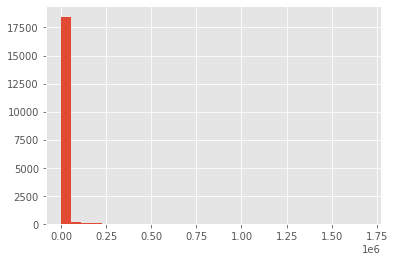

In [299]:
df.likeCount.hist(bins=30);

Если не особо виден, то можно посмотреть на лог шкалу:

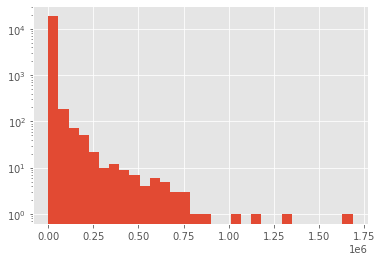

In [54]:
df.likeCount.hist(bins=30, log=True);

То есть у нас в выборке есть клипы с аномальным кол-вом лайков - так называемые хиты. Они то нам и портят всю статистику.  

Попробуем от них избавиться:

**Способ №1:** Откинем $1\%$ нашей выборки клипов, у которых больше всего лайков. Воспользуемся для этого $99\%$ персентилем.

In [55]:
df.likeCount.quantile(0.99)

125029.85000000027

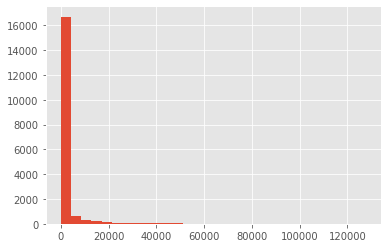

In [301]:
threshold = df.likeCount.quantile(0.99)
df_clear = df[df.likeCount <= threshold]

# визуализируем
df_clear.likeCount.hist(bins=30);

**Способ №2:** Считаем аномалиями все наблюдения, которые оказались за пределами трех межквартильных отклонений.  

### Задача №8:

Реализовать этот метод. Межквартильное отклонение - это разница между 25-м и 75-м перцентилями. 

In [56]:
q1 = df.likeCount.quantile(0.25)
q3 = df.likeCount.quantile(0.75)
iqr = q3 - q1
min_ = q1 - 1.5 * iqr
max_ = q3 + 1.5 * iqr

In [59]:
df[df.likeCount <= max_]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,music_style_int
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.000000,0.000000,1141,0
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.000000,0.000000,3546,0
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.000000,0.000000,3189,0
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.000000,1.000000,3361,0
5,"""Feelin High"" Сергей Лазарев Sergey Lazarev live",7.0,7.0,87.0,popsa,лазарев,9217.0,6.000000,0.000000,3179,0
...,...,...,...,...,...,...,...,...,...,...,...
19116,♫ Музыка Моцарта для детей (Mozart's music for...,41.0,142.0,914.0,classic,classical_channel,308721.0,22.000000,0.000000,1748,2
19118,♫♪ГОЛУБКА ♫♪ группа БУТЫРКА,1.0,1.0,46.0,shanson,бутырка,2704.0,131.594608,8.952899,49,5
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,131.594608,8.952899,44,5
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.000000,0.000000,997,1


Стоит отметить, что иногда искать аномалии требуется не только для обработки данных. Порой, поиск аномалий $-$ это и есть задача. Так, например, аномалиями являются мошенники банка, чье поведение отличается от обычных пользователей. И поиск таких людей и является нашей задачей. 